In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [2]:
class Kmeans():
    
    def __init__(self, K):
        self.K = K  # Number of clusters
        self.cluster_center = np.random.rand(K, 2)  # Randomly initialize cluster centers
        
    def update_Z(self, data):
        # Update cluster assignment for each data point
        
        cost_fn = np.array([norm(data.X - self.cluster_center[i,:], axis=1) \
                            for i in range(self.K)])
        cost_fn = np.transpose(cost_fn)
        
        Z = np.argmin(cost_fn, axis=1)               
        return Z
    
    def update_cluster_means(self, data):
        # Update cluster centers
        
        for k in range(self.K):
            self.cluster_center[k] = np.sum(data.X[data.Z == k], axis=0)/(np.sum(data.Z == k)\
                                                                          + 1e-6)  
            
    def run_kmeans(self, complete_data):
            
        while True:            
            Zold = complete_data.Z            
            complete_data.Z = self.update_Z(complete_data)
            self.update_cluster_means(complete_data)

            if np.array_equal(complete_data.Z, Zold): # Stopping condition is no change in 
                break                                 # latent variable assignment                        

        return complete_data
    
    def plot_kmeans(self, complete_data, title=None):
        
        plt.figure(figsize=(10,5))        
        if title:
            plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')
        for i in range(complete_data.length):
            plt.plot(complete_data.X[i,0], complete_data.X[i,1],clr[complete_data.Z[i]] + '.')
        for k in range(K):
            plt.plot(self.cluster_center[k,0], self.cluster_center[k,1], clr[k] + '^',
                     markersize=12, markeredgecolor='k')    
        plt.show()
            
class Data_tuple():
    
    def __init__(self, data, K):
        self.length = data.shape[0]
        self.X = data    
        self.Z = np.random.randint(K, size=self.length)
    

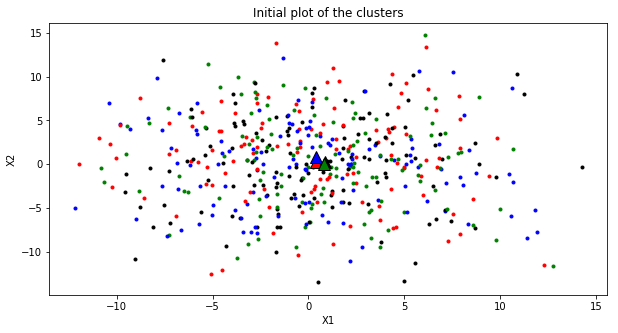

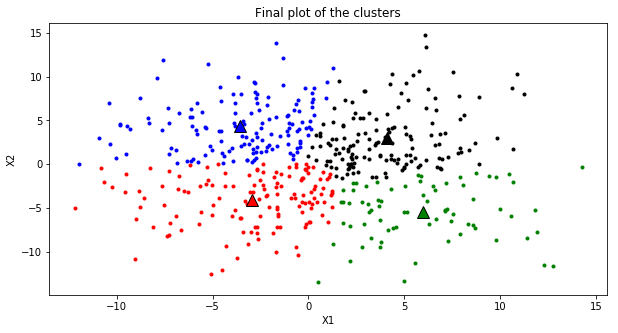

Final Centers on running Kmeans Algorithm 
[[-2.94192248 -4.03767729]
 [-3.56487665  4.38400943]
 [ 4.10958719  2.95317946]
 [ 5.9471073  -5.44211257]]


In [3]:
clr = ['r','b', 'k', 'g']

K = 4  ## Number of clusters
data = np.random.normal(0, 5, size=[500,2])

kmeans_alg = Kmeans(K)
complete_data = Data_tuple(data, K)  # Latent Variable initialized randomly        
kmeans_alg.plot_kmeans(complete_data, 'Initial plot of the clusters')

complete_data = kmeans_alg.run_kmeans(complete_data)
kmeans_alg.plot_kmeans(complete_data, 'Final plot of the clusters')

print "Final Centers on running Kmeans Algorithm "
print kmeans_alg.cluster_center